<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_1_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [ ]:
boston = load_boston()
X,y   = (boston.data, boston.target)
boston.data[:2]
inputs = X.shape[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

404

In [ ]:
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.Sigmoid(),
    nn.Linear(50, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .001)

In [ ]:
num_epochs = 8000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

In [ ]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 100 == 0:
        print(f'Epoch {i}, loss = {loss:.3f}, test loss {test_loss:.3f}')

Epoch 100, loss = 388.467, test loss 370.000
Epoch 200, loss = 283.073, test loss 267.632
Epoch 300, loss = 206.367, test loss 193.569
Epoch 400, loss = 156.222, test loss 145.670
Epoch 500, loss = 124.749, test loss 115.975
Epoch 600, loss = 101.665, test loss 97.746
Epoch 700, loss = 84.445, test loss 83.058
Epoch 800, loss = 69.370, test loss 72.937
Epoch 900, loss = 58.477, test loss 67.917
Epoch 1000, loss = 50.819, test loss 60.621
Epoch 1100, loss = 44.962, test loss 55.722
Epoch 1200, loss = 39.012, test loss 49.534
Epoch 1300, loss = 34.122, test loss 45.360
Epoch 1400, loss = 30.154, test loss 43.132
Epoch 1500, loss = 27.008, test loss 41.146
Epoch 1600, loss = 24.271, test loss 38.558
Epoch 1700, loss = 21.919, test loss 37.644
Epoch 1800, loss = 20.056, test loss 35.945
Epoch 1900, loss = 18.162, test loss 34.472
Epoch 2000, loss = 16.540, test loss 34.082
Epoch 2100, loss = 15.274, test loss 33.068
Epoch 2200, loss = 14.071, test loss 32.496
Epoch 2300, loss = 13.009, tes

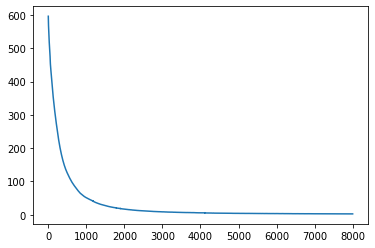

In [ ]:
plt.plot(history)